## 0.1 Import des librairies

In [153]:
# import librairies Pandas, matplotlib et numpy
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as math

# Afficher toutes les lignes des dataframes
pd.set_option("display.max_rows", None, "display.max_columns", None)

## 0.2 préparation disponibilité alimentaire

In [154]:
# CHARGEMENT DU DF
da = pd.read_csv("dispo_alimentaire.csv")

In [155]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilite alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilite alimentaire en quantite (kg/personne/an)         14015 non-null  float64
 7   Disponibilite de matiere grasse en quantite (g/personne/jo

In [156]:
da.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [157]:
print('Taux de remplissage par colonne :','\n',(1-da.isna().sum()/len(da))*100)

Taux de remplissage par colonne : 
 Zone                                                             100.000000
Produit                                                          100.000000
Origine                                                          100.000000
Aliments pour animaux                                             17.430311
Autres Utilisations                                               35.219481
Disponibilite alimentaire (Kcal/personne/jour)                    91.259212
Disponibilite alimentaire en quantite (kg/personne/an)            89.810958
Disponibilite de matiere grasse en quantite (g/personne/jour)     75.578340
Disponibilite de proteines en quantite (g/personne/jour)          74.085229
Disponibilite interieure                                          98.570971
Exportations - Quantite                                           78.346684
Importations - Quantite                                           95.174624
Nourriture                                          

In [158]:
# Vu le nombre de NaN, il semblerait que ce soit plutôt de "vrais 0" que des données manquantes sinon..
# .. le tableau ne serait pas exploitable

# En partant du postulat que les NaN sont de "vrais 0", vérification en comparant les ressources :
# Production + Importations - Exportations +/- Variation de stock
# et les utilisations : Aliments pour animaux, Autres utilisations, Nourritre, Pertes, Semences..
# ..Traitement. 

# Si les NaN sont de "vrais 0" : ressources-utilisations = 0

In [159]:
# Remplacement des NaN par des 0
da_sans_nan = da.fillna(0)
# vérification du fillna :
da_sans_nan.isna().sum()

Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilite alimentaire (Kcal/personne/jour)                   0
Disponibilite alimentaire en quantite (kg/personne/an)           0
Disponibilite de matiere grasse en quantite (g/personne/jour)    0
Disponibilite de proteines en quantite (g/personne/jour)         0
Disponibilite interieure                                         0
Exportations - Quantite                                          0
Importations - Quantite                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                    

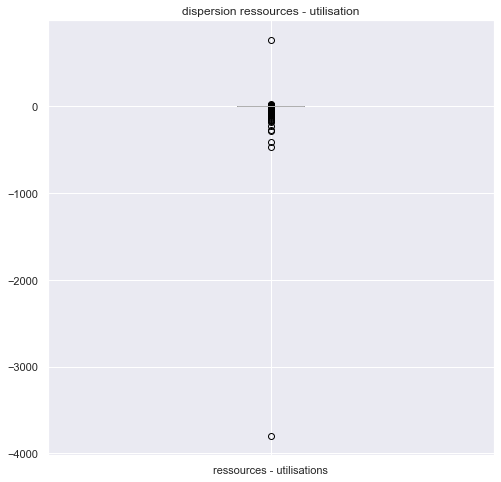

In [160]:
# création des colonnes total ressources, total utilisations et ressources - utilisations
da_sans_nan['total ressources'] = da_sans_nan['Production']+da_sans_nan['Importations - Quantite']+da_sans_nan['Variation de stock']-da_sans_nan['Exportations - Quantite']
da_sans_nan['total utilisations'] = da_sans_nan['Aliments pour animaux']+da_sans_nan['Autres Utilisations']+da_sans_nan['Nourriture']+da_sans_nan['Pertes']+da_sans_nan['Semences']+da_sans_nan['Traitement']
da_sans_nan['ressources - utilisations'] = da_sans_nan['total ressources'] - da_sans_nan['total utilisations']

# dispersion de la comparaison ressources - utilisation
sns.set(rc={'figure.figsize':(8,8)})
plt.title('dispersion ressources - utilisation')
boxplot = da_sans_nan.boxplot(column='ressources - utilisations')

In [161]:
# lignes suspectes en fonction de colonne ressources - utilisations
# critères : <0 tonne & > 0 tonne

# assignation des variables
da__inf_zero = da_sans_nan[da_sans_nan['ressources - utilisations'] < 0]
da_sup_zero = da_sans_nan[da_sans_nan['ressources - utilisations'] > 0]

# affichage des lignes supectes par rapport au df
print('Nb de lignes < 0 tonne de différence:',
      len(da__inf_zero))
print('Nb de lignes au dessus de 0 tonne de différence:',
      len(da_sup_zero))
print('Total des lignes suspectes :', len(da__inf_zero)+len(da_sup_zero))
print('Nb de lignes du df:',len(da_sans_nan))

Nb de lignes < 0 tonne de différence: 1877
Nb de lignes au dessus de 0 tonne de différence: 1797
Total des lignes suspectes : 3674
Nb de lignes du df: 15605


In [162]:
# pourcentage de valeurs suspectes sur l'ensemble du df :
print((len(da__inf_zero)+len(da_sup_zero))/ len(da_sans_nan) * 100,' %')

23.543735982057033  %


In [163]:
# => pourcentage de valeurs supectes trop élevé. Test avec valeurs <-1 et > 1 :

# lignes suspectes en fonction de colonne ressources - utilisations
# critères : <-1 tonne & >1 tonne

# assignation des variables
da__inf_moins1 = da_sans_nan[da_sans_nan['ressources - utilisations'] < -1]
da_sup_plus1 = da_sans_nan[da_sans_nan['ressources - utilisations'] > 1]

# affichage des lignes supectes par rapport au df
print('Nb de lignes < -1 tonne de différence:',
      len(da__inf_moins1))
print('Nb de lignes > 1 tonne de différence:',
      len(da_sup_plus1))
print('Total des lignes suspectes :', len(da__inf_moins1)+len(da_sup_plus1))
print('Nb de lignes du df:',len(da_sans_nan))

Nb de lignes < -1 tonne de différence: 319
Nb de lignes > 1 tonne de différence: 44
Total des lignes suspectes : 363
Nb de lignes du df: 15605


In [164]:
# pourcentage de valeurs suspectes sur l'ensemble du df :
print((len(da__inf_moins1)+len(da_sup_plus1))/ len(da_sans_nan) * 100,' %')

2.326177507209228  %


In [165]:
# création df dispo alimentaire sans lignes suspectes                                                                            
da_sans_suspect = da_sans_nan.drop(da__inf_moins1.index, axis=0) # suppression des valeurs suspectes <-1 sur da
da_sans_suspect = da_sans_suspect.drop(da_sup_plus1.index, axis=0) # suppression des valeurs suspectes >1 sur da
len(da_sans_suspect)+(len(da__inf_moins1)+len(da_sup_plus1))-len(da) # vérif

0

In [166]:
# Étude de la colonne Kcal/pers/jr centrale pour la suite de l'analyse
print('moyenne DA Kcal/pers/jr qd diff <-1:',
      da__inf_moins1['Disponibilite alimentaire (Kcal/personne/jour)'].mean())
print('moyenne DA Kcal/pers/jr qd diff >1:',
      da_sup_plus1['Disponibilite alimentaire (Kcal/personne/jour)'].mean())
print('moyenne DA Kcal/pers/jr sur données ss suspect:',
     da_sans_suspect['Disponibilite alimentaire (Kcal/personne/jour)'].mean())
print('médiane DA Kcal/pers/jr qd diff <-1:',
      da__inf_moins1['Disponibilite alimentaire (Kcal/personne/jour)'].median())
print('médiane DA Kcal/pers/jr qd diff >1:',
      da_sup_plus1['Disponibilite alimentaire (Kcal/personne/jour)'].median())
print('médiane DA Kcal/pers/jr sur données ss suspect:',
      da_sans_suspect['Disponibilite alimentaire (Kcal/personne/jour)'].median())

moyenne DA Kcal/pers/jr qd diff <-1: 43.14420062695925
moyenne DA Kcal/pers/jr qd diff >1: 168.54545454545453
moyenne DA Kcal/pers/jr sur données ss suspect: 31.11553601889516
médiane DA Kcal/pers/jr qd diff <-1: 10.0
médiane DA Kcal/pers/jr qd diff >1: 31.5
médiane DA Kcal/pers/jr sur données ss suspect: 2.0


In [167]:
# => Variations importantes donc étude plus fine de la dispersion des données

<AxesSubplot:xlabel='Repartition', ylabel='Disponibilite alimentaire (Kcal/personne/jour)'>

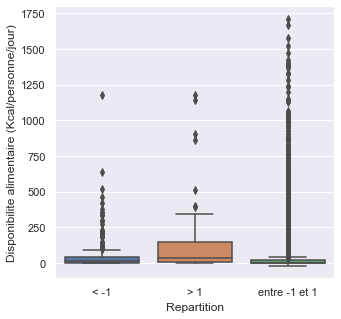

In [168]:
# BOXPLOTS AVEC Y = 'Kcal/pers/jour'
# ET X =
# 1 : ressources - utilisations < -1
# 2 : ressources - utilisations > 1
# 3 : ressources - utilisations entre -1 et 1 (reste du df sans valeurs aberrantes)

# assignation de N° aux 3 dataframes :
df1 = da__inf_moins1.assign(Repartition='< -1')
df2 = da_sup_plus1.assign(Repartition='> 1')
df3 = da_sans_suspect.assign(Repartition='entre -1 et 1')

# concatenation
cdf = pd.concat([df1, df2, df3])

# Redimensionnement du graphique
sns.set(rc={'figure.figsize':(5,5)})

# boxplot des 3 df

sns.boxplot(x='Repartition', y='Disponibilite alimentaire (Kcal/personne/jour)', data=cdf)

[(-10.0, 145.0)]

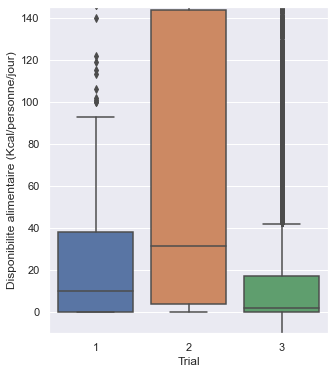

In [169]:
# BOXPLOTS AVEC Y = 'Kcal/pers/jour', FOCUS ENTRE Q1 ET Q3
# ET X =
# 1 : ressources - utilisations < -1
# 2 : ressources - utilisations > 1
# 3 : ressources - utilisations entre -1 et 1 (reste du df sans valeurs aberrantes)

# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = da__inf_moins1.assign(Trial=1)
df2 = da_sup_plus1.assign(Trial=2)
df3 = da_sans_suspect.assign(Trial=3)

# CONCATENATE
cdf = pd.concat([df1, df2, df3])
# boxplots des 3 df
sns.set(rc={'figure.figsize':(5,6)})
# RUN PLOT
ax = sns.boxplot(x='Trial',
                 y='Disponibilite alimentaire (Kcal/personne/jour)',
                 data=cdf)  
ax.set(ylim=(-10, 145))

In [170]:
# LA DISPERSION DES DONNEES ETANT TRES DIFFERENTE,
# ..SUPPRESSION DES LIGNES AVEC RESSOURCES - UTILISATIONS <-1 & >1

# impact de la suppression des données "suspectes" sur le nombre de kcal/pers/jour
print('moyenne avec les données suspectes :',
      da_sans_nan['Disponibilite alimentaire (Kcal/personne/jour)'].mean())
print('moyenne sans les données suspectes',
     da_sans_suspect['Disponibilite alimentaire (Kcal/personne/jour)'].mean())
print('médiane avec les données suspectes',
     da_sans_nan['Disponibilite alimentaire (Kcal/personne/jour)'].median())
print('médiane sans les données suspectes',
     da_sans_suspect['Disponibilite alimentaire (Kcal/personne/jour)'].median())

moyenne avec les données suspectes : 31.748926626081385
moyenne sans les données suspectes 31.11553601889516
médiane avec les données suspectes 3.0
médiane sans les données suspectes 2.0


In [171]:
# SUPPRESSION DES LIGNES AVEC RESSOURCES - UTILISATIONS <-1 & >1
da = da_sans_suspect

In [172]:
# LECTURE DES DONNEES POUR LESQUELLES LA DISPO ALIM PAR JOUR > 40
da_haute = da[da['Disponibilite alimentaire (Kcal/personne/jour)'] > 40]
da_haute.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations
7,Afghanistan,Ble,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0,5992.0,5992.0,0.0
25,Afghanistan,Huile de Palme,vegetale,0.0,55.0,51.0,2.09,5.74,0.00,119.0,0.0,119.0,64.0,0.0,0.0,0.0,0.0,0.0,119.0,119.0,0.0
29,Afghanistan,Lait - Excl Beurre,animale,123.0,0.0,100.0,62.23,5.19,6.12,2083.0,0.0,248.0,1901.0,58.0,1835.0,0.0,0.0,0.0,2083.0,2082.0,1.0
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.0,0.0,141.0,13.82,0.27,2.70,461.0,0.0,119.0,422.0,24.0,342.0,14.0,0.0,0.0,461.0,460.0,1.0
48,Afghanistan,Sucre Eq Brut,vegetale,0.0,0.0,84.0,8.35,0.00,0.00,255.0,0.0,271.0,255.0,0.0,2.0,0.0,0.0,-19.0,254.0,255.0,-1.0


In [173]:
# => Ca peut être de vraies données donc pas de suppression

## 0.3 préparation population

In [174]:
pop = pd.read_csv("population.csv")

In [175]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Annee   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [176]:
pop.describe()

,Annee,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [177]:
# changement des noms de Zone pour matcher avec noms de Zone dans dispo alimentaire
pd.options.mode.chained_assignment = None  # default='warn'
pop['Zone'] = pop['Zone'].str.replace(
    'Chine - continentale', 'Chine continentale')
pop['Zone'] = pop['Zone'].str.replace(
    'Chine - Taiwan Province de', 'Chine_Province_de_Taiwan')
pop['Zone'] = pop['Zone'].str.replace(
    'Israël', 'Israel')
pop['Zone'] = pop['Zone'].str.replace(
    'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord', 'Royaume-Uni')
pop['Zone'] = pop['Zone'].str.replace(
    'Tchequie', 'Tchequie (la)')
# création colonne population (valeur est en milliers)
pop['population'] = pop['Valeur'] * 1000
# suppression colonne Valeur
pop.drop(columns=['Valeur'], inplace=True)

## 0.4 préparation sous-nutrition

In [178]:
# lecture du csv
sn = pd.read_csv("sous_nutrition.csv")

In [179]:
# type de données et taux de remplissage
sn.info()
print('\n',
      'Taux de remplissage par colonne :',
      '\n',(1-sn.isna().sum()/len(sn))*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Annee   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB

 Taux de remplissage par colonne : 
 Zone      100.000000
Annee     100.000000
Valeur     51.231527
dtype: float64


In [180]:
# les NaN représentent les 0 qui n'ont pas été indiqués dans les données d'origine
# => suppression des valeurs manquantes
sn = sn.dropna() # suppression des NA
sn.info() # vérification

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    624 non-null    object
 1   Annee   624 non-null    object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 19.5+ KB


In [181]:
# vérification présence de 0
len(sn[sn['Valeur'] == 0])

0

In [182]:
# suppression des lignes avec 0 car données inutiles
sn.drop(sn.index[sn['Valeur'] == 0], inplace=True)
# vérification
sn[sn['Valeur'] == 0]

,Zone,Annee,Valeur


In [183]:
# COLONNE VALEUR = TYPE OBJECT CAR PRESENCE DE '<0.1'

# Décompte des '<0.1'
len(sn[sn['Valeur'] == '<0.1'])

120

In [184]:
# DATAFRAMES AVEC '<0.1' TRANSFORME EN 0
sn_zero = sn # création nouveau df ad hoc
sn_zero.loc[sn_zero.Valeur == '<0.1', 'Valeur'] = '0' # remplacement des '<0.1' par '0'
sn_zero[sn_zero['Valeur'] == '<0.1'] # vérification

,Zone,Annee,Valeur


In [185]:
# Conversion colonne Valeur en float
sn_zero['Valeur']=sn_zero['Valeur'].astype(float)
sn_zero.info() # vérification

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    624 non-null    object 
 1   Annee   624 non-null    object 
 2   Valeur  624 non-null    float64
dtypes: float64(1), object(2)
memory usage: 39.5+ KB


In [186]:
# DATAFRAMES AVEC '<0.1' TRANSFORME EN 0.05
sn_zerocinq = sn # création nouveau df ad hoc
sn_zero.loc[sn_zero.Valeur == '<0.1', 'Valeur'] = '0' # remplacement des '<0.1' par '0.05'
sn_zero[sn_zero['Valeur'] == '<0.1'] # vérification

,Zone,Annee,Valeur


In [187]:
# Conversion colonne Valeur en float
sn_zerocinq['Valeur']=sn_zerocinq['Valeur'].astype(float)
sn_zerocinq.info() # vérification

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    624 non-null    object 
 1   Annee   624 non-null    object 
 2   Valeur  624 non-null    float64
dtypes: float64(1), object(2)
memory usage: 39.5+ KB


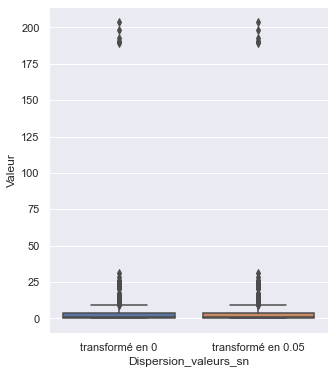

In [188]:
# BOXPLOTS AVEC '<0.1' CHANGES EN 0 OU 0.05 POUR LES COMPARER

# DATAFRAMES AVEC ASSIGNATION DE COLONNES CATEGORIELLES
df1 = sn_zero.assign(Dispersion_valeurs_sn='transformé en 0')
df2 = sn_zerocinq.assign(Dispersion_valeurs_sn='transformé en 0.05')

# CONCATENATION
cdf = pd.concat([df1, df2])

# RUN PLOT
sns.set(rc={'figure.figsize':(5,6)}) 
ax = sns.boxplot(x='Dispersion_valeurs_sn', y='Valeur', data=cdf)

mediane si rplct par 0: 1.1
mediane si rplct par 0.05: 1.1
moyenne si rplct par 0: 5.103846153846157
moyenne si rplct par 0.05: 5.103846153846157


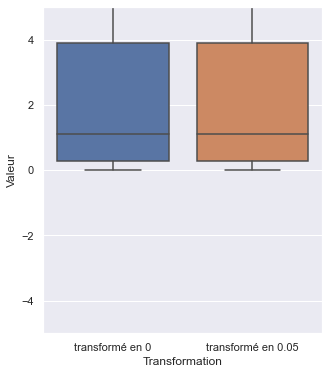

In [189]:
# COMPARAISON BOXPLOTS AVEC '<0.1' CHANGES EN 0 OU 0.05 AVEC FOCUS DE Q1 A Q3

# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = sn_zero.assign(Transformation='transformé en 0')
df2 = sn_zerocinq.assign(Transformation='transformé en 0.05')

# CONCATENATE
cdf = pd.concat([df1, df2])
# RUN PLOT
sns.set(rc={'figure.figsize':(5,6)}) 
ax = sns.boxplot(x='Transformation', y='Valeur', data=cdf)
ax.set(ylim=(-5, 5))
print('mediane si rplct par 0:',sn_zero['Valeur'].median())
print('mediane si rplct par 0.05:',sn_zerocinq['Valeur'].median())
print('moyenne si rplct par 0:',sn_zero['Valeur'].mean())
print('moyenne si rplct par 0.05:',sn_zerocinq['Valeur'].mean())

In [190]:
# QUELQUE SOIT LA SOLUTION, PAS DE CHANGEMENT DU RESULTAT SUR LES DONNEES
# => TRANSFORMATION EN 0.05
sn = sn_zerocinq

In [191]:
# Type colonne Annee = object car fourchettes

# remplacement des fourchettes d'années par l'année centrale. Ex : 2012-2014 => 2013
sn['Annee'] = sn['Annee'].map({'2012-2014':'2013','2013-2015':'2014','2014-2016':'2015',
                               '2015-2017':'2016','2016-2018':'2017','2017-2019':'2018'},
                             na_action=None)

In [192]:
# TRANSFORMATION TYPE COLONNE ANNEE EN FLOAT
sn['Annee']=sn['Annee'].astype(float)

In [193]:
# Transformation colonne Valeur : * 1 000 000
sn['Valeur'] = sn['Valeur'] * 1000000

In [194]:
sn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    624 non-null    object 
 1   Annee   624 non-null    float64
 2   Valeur  624 non-null    float64
dtypes: float64(2), object(1)
memory usage: 39.5+ KB


In [195]:
sn.describe()

,Annee,Valeur
count,624.000000,6.240000e+02
mean,2015.495192,5.103846e+06
std,1.712003,1.945083e+07
min,2013.000000,0.000000e+00
25%,2014.000000,2.750000e+05
50%,2015.000000,1.100000e+06
75%,2017.000000,3.900000e+06
max,2018.000000,2.038000e+08


## 0.5 Préparation Aide alimentaire

In [196]:
aa = pd.read_csv("aide_alimentaire.csv")

In [197]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays beneficiaire  1475 non-null   object
 1   Annee              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [198]:
aa.describe()

,Annee,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


## 1. proportion de personnes en sous-nutrition en 2018

In [199]:
# nb de personnes en sous-nutrition en 2018 :
sn_2018 = sn[sn['Annee'] == 2018]
sum_sn_2018 = (sn_2018['Valeur'].sum())
print('nb de personnes en sous-nutrition : ',sum_sn_2018)
# population mondiale en 2018
pop_2018 = pop[pop['Annee'] == 2018]
sum_pop_2018 = (pop_2018['population'].sum())
print('population mondiale 2018 : ',sum_pop_2018)
# Proportion du nombre de personnes en sous-nutrition
print('pourcentage de personnes en sous-nutrition en 2018 : ',sum_sn_2018 / sum_pop_2018 * 100)

nb de personnes en sous-nutrition :  544200000.0
population mondiale 2018 :  7631368523.0
pourcentage de personnes en sous-nutrition en 2018 :  7.131093176274328


## 2. nombre théorique de personnes pouvant être nourries en 2017
### (dernières données pour la disponibilité  alimentaire : 2017)

In [200]:
# population par zone en 2017
pop2017 = pop[pop['Annee'] == 2017]
pop_2017 = pop2017[['Zone', 'population']]
pop2017 = pop[['Zone', 'population']]

In [201]:
pop_2017.head()

,Zone,population
4,Afghanistan,36296113.0
10,Afrique du Sud,57009756.0
16,Albanie,2884169.0
22,Algerie,41389189.0
28,Allemagne,82658409.0


In [202]:
# jointure des tables da et pop_2017
da = pd.merge(da, pop_2017,left_on='Zone', right_on='Zone', how='left')

In [203]:
da.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations,population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,53.0,53.0,0.0,36296113.0
1,Afghanistan,Agrumes-Autres,vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,41.0,41.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,82.0,82.0,0.0,36296113.0


In [204]:
# VERIFICATION DE LA JOINTURE
da[da['population'].isnull()]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations,population


In [205]:
da['Dispo alim (Kcal/jour)'] = da['Disponibilite alimentaire (Kcal/personne/jour)']*da['population']
cal_world = da['Dispo alim (Kcal/jour)'].sum()
print('Nb de Kcal disponibles par jour dans le monde :',cal_world)

# Seuil nutritionnel : 2 200 Kcal/pers/jour

# calcul du nombre de personnes pouvant être nourries
print('Nb de personnes pouvant être nourries :', cal_world / 2200)

Nb de Kcal disponibles par jour dans le monde : 19111324382655.0
Nb de personnes pouvant être nourries : 8686965628.479546


## 3. nombre théorique de personnes pouvant être nourries par des produits végétaux en 2017

In [206]:
da_vegetables = da[da['Origine'] == 'vegetale'] # création df avec alim. origine végétale
# création de la colonne Dispo alim (Kcal/jour)
da_vegetables['Dispo alim (Kcal/jour)'] = da_vegetables['Disponibilite alimentaire (Kcal/personne/jour)']*da_vegetables['population']
cal_world = da_vegetables['Dispo alim (Kcal/jour)'].sum() # somme des kcal/jour
print('Nb de Kcal végétales disponibles par jour dans le monde :',cal_world)

# Seuil nutritionnel : 2 200 Kcal/pers/jour

# calcul du nombre de personnes pouvant être nourries
print('Nb de personnes pouvant être nourries avec alim. d\'origine végétale:', cal_world / 2200)

Nb de Kcal végétales disponibles par jour dans le monde : 15673969924087.0
Nb de personnes pouvant être nourries avec alim. d'origine végétale: 7124531783.675909


## 4. Utilisation de la disponibilité intérieure

In [207]:
# SUPPRESSION DES DISPONIBILITES INTERIEURES = 0 
# car 0 / x = infini si x != 0

da.drop(da.index[da['Disponibilite interieure'] == 0], inplace=True) # suppression des 0
da[da['Disponibilite interieure'] == 0] # vérification

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations,population,Dispo alim (Kcal/jour)


In [208]:
# calcul de la somme de la disponibilité intérieure
somme_di = da['Disponibilite interieure'].sum()

# calcul de la somme de l'alimentation animale
somme_alim_animale = da['Aliments pour animaux'].sum()
# calcul du pourcentage d'utilisation de la disponibilité intérieure
df1 = somme_alim_animale/somme_di*100

# calcul de la somme de l'alimentation humaine
somme_alim_humaine = da['Nourriture'].sum()
# calcul du pourcentage d'utilisation de la disponibilité intérieure
df2 = somme_alim_humaine/somme_di*100

# calcul de la somme passée en pertes
somme_pertes = da['Pertes'].sum()
# calcul du pourcentage d'utilisation de la disponibilité intérieure
df3 = somme_pertes/somme_di*100

# calcul de la somme des semences
somme_semences = da['Semences'].sum()
# calcul du pourcentage d'utilisation de la disponibilité intérieure
df4 = somme_semences/somme_di*100

# calcul de la somme du traitement
somme_traitement = da['Traitement'].sum()
# calcul du pourcentage d'utilisation de la disponibilité intérieure
df5 = somme_traitement/somme_di*100

# calcul de la somme des autres utilisations
somme_autres_utilisations = da['Autres Utilisations'].sum()
# calcul du pourcentage d'utilisation de la disponibilité intérieure
df6 = somme_autres_utilisations/somme_di*100

# vérification : somme des pourcentages doit être égale à 1
round(df1+df2+df3+df4+df5+df6,0)

100.0

### Graphique récapitulatif

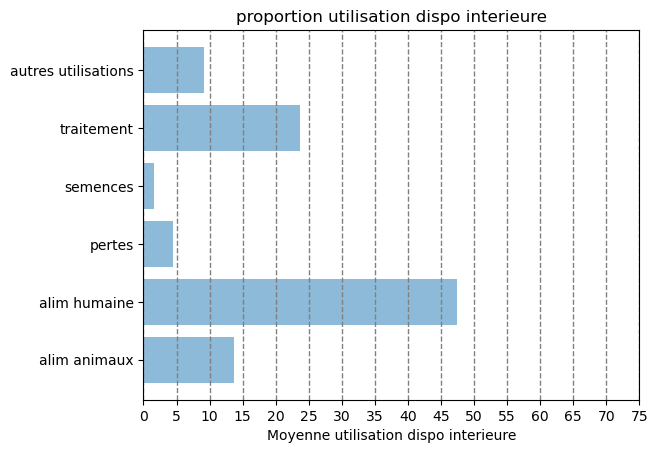

In [209]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

objects = ('alim animaux', 'alim humaine', 'pertes', 'semences', 'traitement', 'autres utilisations')
y_pos = np.arange(len(objects))
performance = [df1,df2,df3,df4,df5,df6]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)

plt.xlabel('Moyenne utilisation dispo interieure')
plt.title('proportion utilisation dispo interieure')
plt.grid(color='gray', linestyle='--', linewidth=1, axis='x', alpha=1)
plt.xticks(np.arange(0, 80, step=5))
plt.show()

## 5.1 proportion sous-alimentation en 2017

In [210]:
sn_2017 = sn[sn['Annee'] == 2017] # création df avec données sous-nutrition 2017
# création colonne sn_2017 pr chaque zone sur population en 2017
sn_2017 = pd.merge(sn_2017, pop_2017,left_on='Zone', right_on='Zone', how='left')
# changement du nom de la colonne 'valeur' en 'sn_2017'
sn_2017.rename(columns={'Valeur': 'sn_2017'}, inplace=True)
# création colonne %age de personnes en sous-nutrition
sn_2017['proportion sn'] = sn_2017['sn_2017'] / sn_2017['population']
# VERIFICATION DE LA JOINTURE
sn_2017[sn_2017['population'].isnull()]

,Zone,Annee,sn_2017,population,proportion sn


In [211]:
pop_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   population  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [212]:
sn_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zone           104 non-null    object 
 1   Annee          104 non-null    float64
 2   sn_2017        104 non-null    float64
 3   population     104 non-null    float64
 4   proportion sn  104 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [213]:
sn_2017.head()

,Zone,Annee,sn_2017,population,proportion sn
0,Afghanistan,2017.0,10500000.0,36296113.0,0.289287
1,Afrique du Sud,2017.0,3100000.0,57009756.0,0.054377
2,Albanie,2017.0,100000.0,2884169.0,0.034672
3,Algerie,2017.0,1300000.0,41389189.0,0.031409
4,Angola,2017.0,5800000.0,29816766.0,0.194521


In [214]:
sn_2017.sort_values(by='proportion sn', ascending=False)

,Zone,Annee,sn_2017,population,proportion sn
41,Haiti,2017.0,5300000.0,1.098237e+07,0.482592
82,Republique populaire democratique de Coree,2017.0,12000000.0,2.542982e+07,0.471887
57,Madagascar,2017.0,10500000.0,2.557051e+07,0.410629
55,Liberia,2017.0,1800000.0,4.702226e+06,0.382797
53,Lesotho,2017.0,800000.0,2.091534e+06,0.382494
94,Tchad,2017.0,5700000.0,1.501675e+07,0.379576
84,Rwanda,2017.0,4200000.0,1.198096e+07,0.350556
66,Mozambique,2017.0,9400000.0,2.864902e+07,0.328109
96,Timor-Leste,2017.0,400000.0,1.243258e+06,0.321735
0,Afghanistan,2017.0,10500000.0,3.629611e+07,0.289287


## 5.2 Pays ayant le plus bénéficié d'aides depuis 2013

In [215]:
sommes_aide_alim_par_zone = pd.pivot_table(aa,
                                           values=['Valeur'],
                                           aggfunc='sum',
                                           index='Pays beneficiaire')

In [216]:
sommes_aide_alim_par_zone.sort_values(by='Valeur', ascending=False)

,Valeur
Pays beneficiaire,
Republique arabe syrienne,1858943
Ethiopie,1381294
Yemen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
Republique democratique du Congo,288502


## 5.3.1 disponibilité alimentaire en Kcal/pers/jour par habitant en 2017 par zone

In [217]:
# création du df sommant les disponibilités en kcal/pers/jour des aliments par zone                    
dispo_par_hab_par_zone = pd.pivot_table(da,
                                    values=['Disponibilite alimentaire (Kcal/personne/jour)'],
                                    aggfunc='sum',
                                    index='Zone')

In [218]:
dispo_par_hab_par_zone.sort_values(by='Disponibilite alimentaire (Kcal/personne/jour)',
                                   ascending=False)

,Disponibilite alimentaire (Kcal/personne/jour)
Zone,
Autriche,3708.0
Turquie,3697.0
Israel,3593.0
Luxembourg,3473.0
Italie,3468.0
Montenegro,3419.0
Lituanie,3410.0
Cuba,3400.0
Maroc,3377.0


## 5.3.2 disponibilité nourriture en kilogs par habitant en 2017 par zone

In [219]:
# création du df sommant les disponibilités en nourriture des aliments par zone                                                                                          
dispo_nourr_par_zone = pd.pivot_table(da,
                                    values=['Nourriture'],
                                    aggfunc='sum',
                                    index='Zone')
# ajout colonne population
dispo_nourr_par_zone = pd.merge(dispo_nourr_par_zone,
                                     pop_2017,
                                     left_on='Zone',
                                     right_on='Zone',
                                     how='left')
# ajout colonne dispo nourriture par habitant
dispo_nourr_par_zone['dispo par habitant en kgs']=dispo_nourr_par_zone['Nourriture']/dispo_nourr_par_zone['population']*1000000

In [220]:
dispo_nourr_par_zone.sort_values(by='dispo par habitant en kgs', ascending=False)

,Zone,Nourriture,population,dispo par habitant en kgs
2,Albanie,3476.0,2.884169e+06,1205.199834
108,Montenegro,752.0,6.275630e+05,1198.286068
64,Grece,11892.0,1.056945e+07,1125.129501
94,Lituanie,3169.0,2.845414e+06,1113.721940
138,Roumanie,21772.0,1.965397e+07,1107.766070
22,Bosnie-Herzegovine,3498.0,3.351525e+06,1043.703985
130,Portugal,10605.0,1.028853e+07,1030.759797
95,Luxembourg,607.0,5.919100e+05,1025.493741
81,Italie,60211.0,6.067370e+07,992.373945
44,Danemark,5659.0,5.732274e+06,987.217289


## 6 Céréales

##### constitution df avec données sur les céréales

In [221]:
# données sur les céréales trouvées sur :
# https://www.fao.org/faostat/fr/#data/FBS
# dans groupe de poduits, sélection de céréales sauf la bière
# et extraction résultats de tous les pays pour 2018

In [222]:
# création df pour les céréales à partir de la disponibilité alimentaire
da_cereales = da.loc[((da['Produit'] == 'Avoine') 
                     | (da['Produit'] == 'Ble')
                     | (da['Produit'] == 'Cereales-Autres')
                     | (da['Produit'] == 'Mais')
                     | (da['Produit'] == 'Millet')
                     | (da['Produit'] == 'Orge')
                     | (da['Produit'] == 'Riz (Eq Blanchi)')
                     | (da['Produit'] == 'Seigle')
                     | (da['Produit'] == 'Sorgho')
                     )]

In [223]:
da_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations,population,Dispo alim (Kcal/jour)
7,Afghanistan,Ble,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0,5992.0,5992.0,0.0,36296113.0,4.968938e+10
32,Afghanistan,Mais,vegetale,200.0,0.0,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,0.0,0.0,313.0,312.0,1.0,36296113.0,7.622184e+08
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13.0,0.0,0.0,12.0,1.0,13.0,0.0,0.0,0.0,13.0,13.0,0.0,36296113.0,1.088883e+08
40,Afghanistan,Orge,vegetale,360.0,0.0,26.0,2.92,0.24,0.79,524.0,0.0,10.0,89.0,52.0,514.0,22.0,0.0,0.0,524.0,523.0,1.0,36296113.0,9.436989e+08
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.0,0.0,141.0,13.82,0.27,2.70,461.0,0.0,119.0,422.0,24.0,342.0,14.0,0.0,0.0,461.0,460.0,1.0,36296113.0,5.117752e+09


Text(0.5, 0, 'Utilisation des céréales')

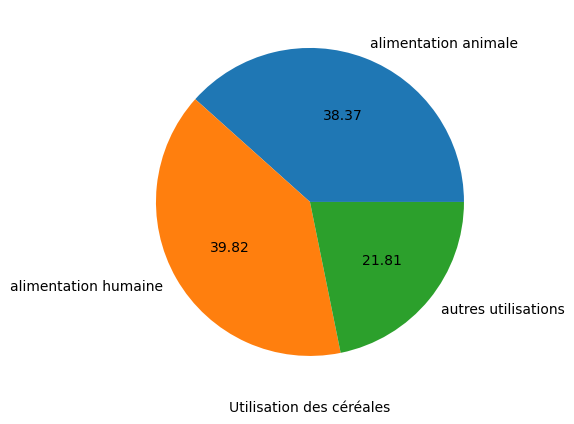

In [224]:
# somme de la disponibilité intérieure
somme_di = da_cereales['Disponibilite interieure'].sum()

# calcul des pourcentages d'utilisation pour l'alimentation animale et humaine
pourcentage_alim_animale = da_cereales['Aliments pour animaux'].sum()/somme_di*100
pourcentage_alim_humaine = da_cereales['Nourriture'].sum()/somme_di*100
pourcentage_autres = 100 - (pourcentage_alim_animale+pourcentage_alim_humaine)

# Création d'un pie chart
df = pd.DataFrame({'utilisation céréales': [pourcentage_alim_animale,
                                  pourcentage_alim_humaine,
                                  pourcentage_autres]},
                  index=['alimentation animale', 'alimentation humaine', 'autres utilisations'])
plot = df.plot.pie(y='utilisation céréales', autopct='%.2f', figsize=(5, 5))
plot.axes.get_legend().remove()
axes = plt.gca()
axes.set_ylabel('')
axes.set_xlabel('Utilisation des céréales')

## 7 Utilisation du Manioc par la Thaïlande

In [225]:
# création df sur la dispo alimentaire du Manioc par la Thailande
da_thailande_manioc = da.loc[((da['Zone'] == 'Thailande')
                      & (da['Produit'] == 'Manioc'))]
# sous-nutrition en 2017 en Thailande
sn_2017_thailande = sn.loc[((sn['Zone'] == 'Thailande')
                           & (sn['Annee'] == 2017))]
print('personnes en sous-nutrition',sn_2017_thailande['Valeur'].sum())
print('proportion exportation par rapport à production :',
      da_thailande_manioc['Exportations - Quantite'].sum()/da_thailande_manioc['Production'].sum())

personnes en sous-nutrition 6200000.0
proportion exportation par rapport à production : 0.8341272991928014
